## Analysis of Flight Number vs Launch Site

### Objective
Investigate the relationship between launch sequence (Flight Number) and launch locations to determine if:
1. Certain launch sites are used more frequently as SpaceX's program matured
2. Success rates vary between different launch sites
3. Launch patterns evolved over time

### Approach
We'll visualize the Flight Number (x-axis) against Launch Site (y-axis) and color-code by landing outcome (Class). This will reveal site-specific launch patterns and success trends over SpaceX's launch history.

In [11]:
# Make sure the dataframe is properly loaded
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(dataset_part_2_csv)

# Check if the dataframe loaded correctly
print("DataFrame loaded successfully with shape:", df.shape)
print("\nFirst 5 rows:")
df.head(5)

DataFrame loaded successfully with shape: (90, 18)

First 5 rows:


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


<Figure size 1200x600 with 0 Axes>

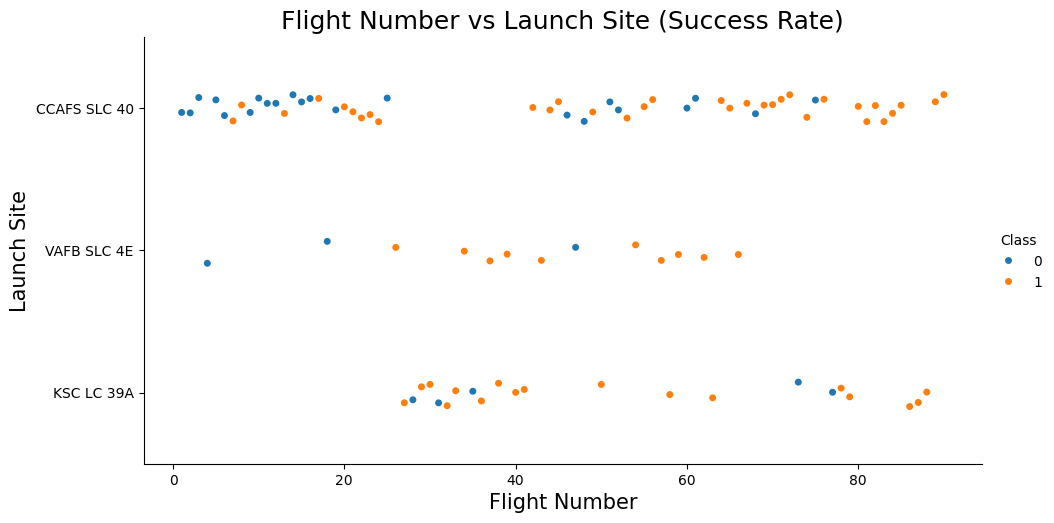

In [12]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(12, 6))
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs Launch Site (Success Rate)", fontsize=18)
plt.show()

## Analysis of Payload Mass vs Launch Site

### Objective
Examine the relationship between payload mass and launch sites to determine:
1. If certain launch sites accommodate heavier payloads
2. Whether payload mass impacts landing success probability
3. If there are payload mass limitations at specific sites

### Approach
We'll visualize Payload Mass (x-axis) against Launch Site (y-axis) with success/failure color coding. This will reveal payload capacity patterns across different launch facilities and potential mass-related constraints on landing success.

### Significance
Payload mass directly impacts mission energy requirements and influences the fuel available for landing operations. Understanding this relationship is crucial for cost estimation and mission planning.

<Figure size 1200x600 with 0 Axes>

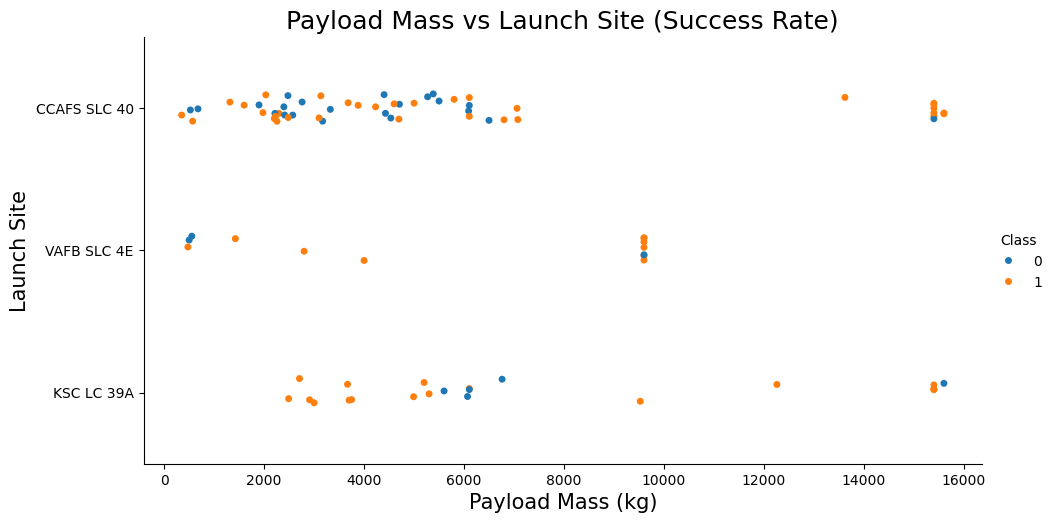


Payload Mass Statistics by Launch Site:

CCAFS SLC 40:
  Payload Range: 350 - 15600 kg
  Average Mass: 5548 kg
  Success Rate: 60.0%
  Total Launches: 55.0

KSC LC 39A:
  Payload Range: 2490 - 15600 kg
  Average Mass: 7606 kg
  Success Rate: 77.3%
  Total Launches: 22.0

VAFB SLC 4E:
  Payload Range: 475 - 9600 kg
  Average Mass: 5919 kg
  Success Rate: 76.9%
  Total Launches: 13.0


In [13]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(12, 6))
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass vs Launch Site (Success Rate)", fontsize=18)
plt.show()

# Calculate payload statistics by site
print("\nPayload Mass Statistics by Launch Site:")
site_stats = df.groupby('LaunchSite')['PayloadMass'].agg(['min', 'max', 'mean', 'count'])
site_stats['success_rate'] = df.groupby('LaunchSite')['Class'].mean() * 100

# Format the output table
for site, row in site_stats.iterrows():
    print(f"\n{site}:")
    print(f"  Payload Range: {row['min']:.0f} - {row['max']:.0f} kg")
    print(f"  Average Mass: {row['mean']:.0f} kg")
    print(f"  Success Rate: {row['success_rate']:.1f}%")
    print(f"  Total Launches: {row['count']}")

## Analysis of Success Rate by Orbit Type

### Objective
Investigate how landing success rates vary across different orbital destinations to determine:
1. Which orbit types have the highest landing success rates
2. How mission profiles to different orbits impact recovery probability
3. The relationship between orbit energy requirements and landing success

### Approach
We'll calculate the success rate for each orbit type and visualize using a bar chart, sorted in descending order of success. This provides clear insight into which mission profiles have historically been more favorable for first stage recovery.

### Significance
Different orbits require varying amounts of fuel and have different mission profiles. Understanding success rates by orbit helps with:
- Mission planning and recovery expectations
- Cost estimation for different orbit types
- Risk assessment for specific mission profiles

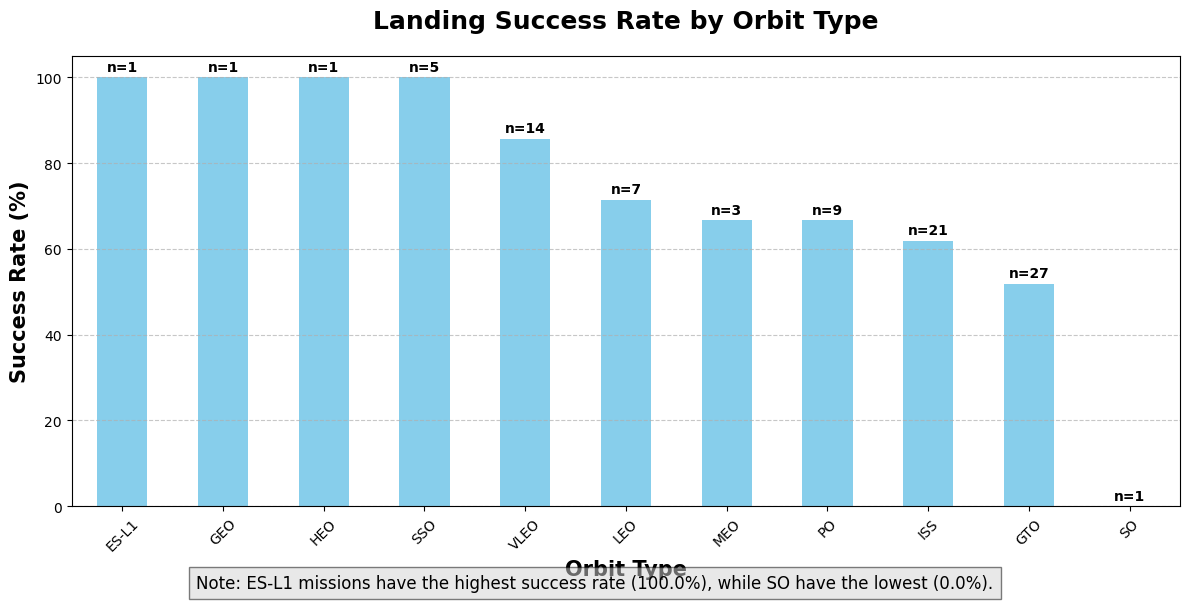

In [14]:
# Calculate success rate for each orbit
orbit_success = df.groupby('Orbit')['Class'].mean() * 100
orbit_counts = df.groupby('Orbit').size()

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = orbit_success.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Orbit Type', fontsize=15, fontweight='bold')
plt.ylabel('Success Rate (%)', fontsize=15, fontweight='bold')
plt.title('Landing Success Rate by Orbit Type', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for i, (orbit, rate) in enumerate(orbit_success.sort_values(ascending=False).items()):
    count = orbit_counts[orbit]
    plt.text(i, rate+1.5, f'n={count}', ha='center', fontweight='bold')

# Add analysis note
low_success = orbit_success.idxmin()
high_success = orbit_success.idxmax()
plt.figtext(0.5, 0.01, 
            f"Note: {high_success} missions have the highest success rate ({orbit_success[high_success]:.1f}%), while {low_success} have the lowest ({orbit_success[low_success]:.1f}%).",
            ha='center', fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()

## Analysis of Flight Number vs Orbit Type

### Objective
Explore the relationship between SpaceX's mission experience (Flight Number) and targeted orbits to understand:
1. How SpaceX's orbit destination patterns evolved over time
2. Whether success rates for specific orbits improved with experience
3. If SpaceX shifted focus to certain orbits as their technology matured

### Approach
We'll visualize Flight Number (x-axis) against Orbit Type (y-axis) with points color-coded by landing outcome. This temporal view reveals orbit targeting patterns and success evolution across SpaceX's launch history.

### Significance
This analysis helps identify:
- Learning curves for specific orbit types
- Strategic shifts in SpaceX's mission portfolio
- Correlation between launch experience and success for challenging orbits

<Figure size 1200x800 with 0 Axes>

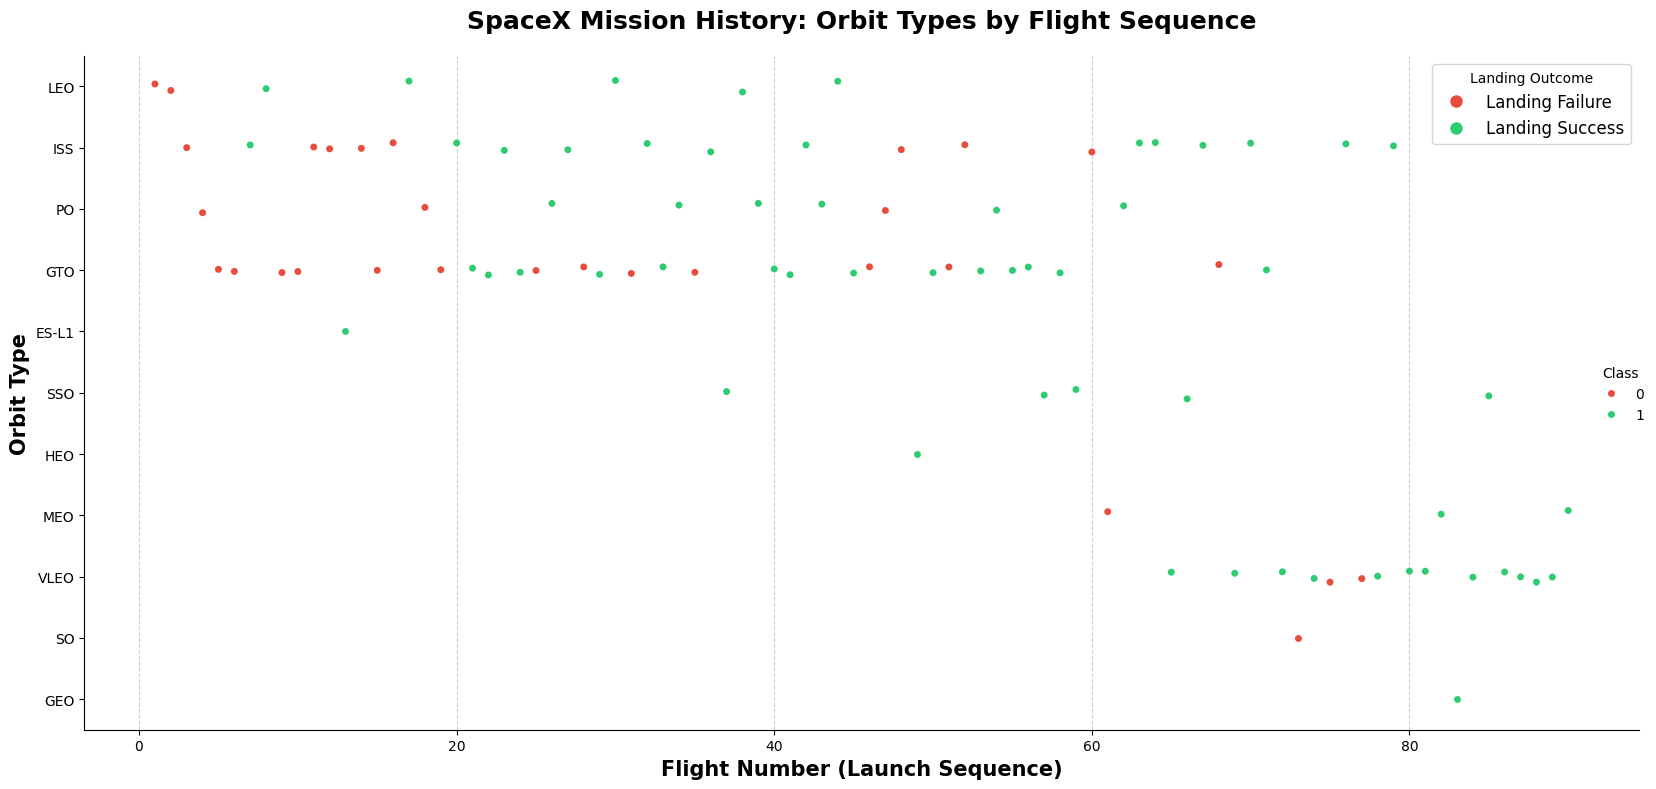


Orbit Distribution Analysis:
GTO: 27 launches (30.0% of total)
ISS: 21 launches (23.3% of total)
VLEO: 14 launches (15.6% of total)
PO: 9 launches (10.0% of total)
LEO: 7 launches (7.8% of total)
SSO: 5 launches (5.6% of total)
MEO: 3 launches (3.3% of total)
ES-L1: 1 launches (1.1% of total)
GEO: 1 launches (1.1% of total)
HEO: 1 launches (1.1% of total)
SO: 1 launches (1.1% of total)


In [15]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2, height=8,
            palette={0: '#E74C3C', 1: '#2ECC71'})  # Red for failure, Green for success

plt.xlabel("Flight Number (Launch Sequence)", fontsize=15, fontweight='bold')
plt.ylabel("Orbit Type", fontsize=15, fontweight='bold')
plt.title("SpaceX Mission History: Orbit Types by Flight Sequence", fontsize=18, fontweight='bold', pad=20)

# Add custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#E74C3C', markersize=10, label='Landing Failure'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#2ECC71', markersize=10, label='Landing Success')
]
plt.legend(handles=legend_elements, title="Landing Outcome", loc="upper right", frameon=True, fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print orbit distribution statistics
print("\nOrbit Distribution Analysis:")
orbit_counts = df.groupby('Orbit').size().sort_values(ascending=False)
total = len(df)
for orbit, count in orbit_counts.items():
    print(f"{orbit}: {count} launches ({count/total*100:.1f}% of total)")

# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2, height=8,
            palette={0: '#E74C3C', 1: '#2ECC71'})  # Red for failure, Green for success

plt.xlabel("Flight Number (Launch Sequence)", fontsize=15, fontweight='bold')
plt.ylabel("Orbit Type", fontsize=15, fontweight='bold')
plt.title("SpaceX Mission History: Orbit Types by Flight Sequence", fontsize=18, fontweight='bold', pad=20)

# Add custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#E74C3C', markersize=10, label='Landing Failure'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#2ECC71', markersize=10, label='Landing Success')
]
plt.legend(handles=legend_elements, title="Landing Outcome", loc="upper right", frameon=True, fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print orbit distribution statistics
print("\nOrbit Distribution Analysis:")
orbit_counts = df.groupby('Orbit').size().sort_values(ascending=False)
total = len(df)
for orbit, count in orbit_counts.items():
    print(f"{orbit}: {count} launches ({count/total*100:.1f}% of total)")

<Figure size 1200x800 with 0 Axes>

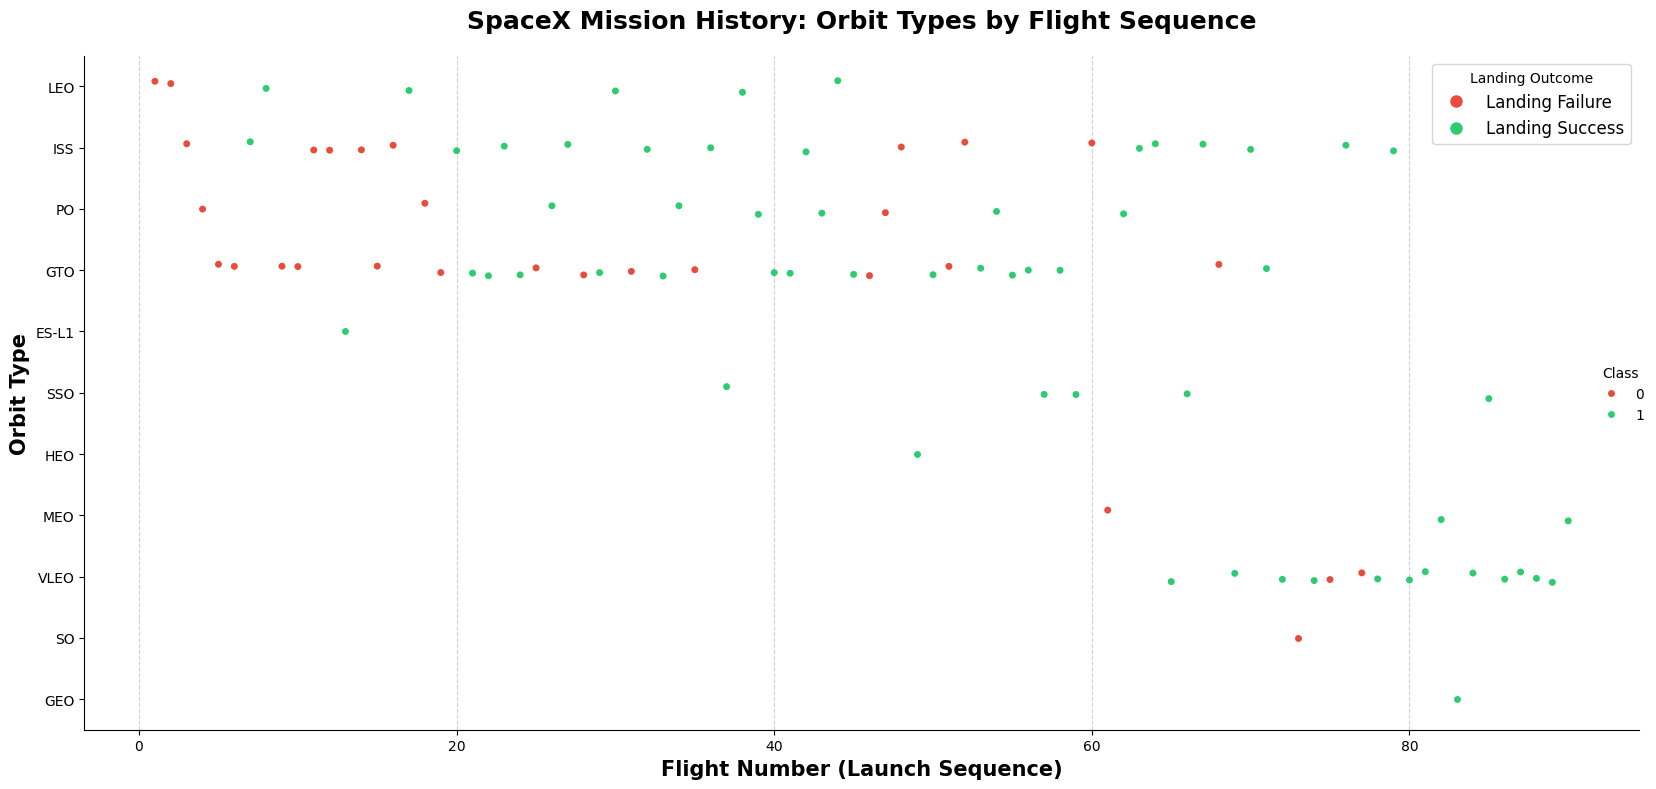


Orbit Distribution Analysis:
GTO: 27 launches (30.0% of total)
ISS: 21 launches (23.3% of total)
VLEO: 14 launches (15.6% of total)
PO: 9 launches (10.0% of total)
LEO: 7 launches (7.8% of total)
SSO: 5 launches (5.6% of total)
MEO: 3 launches (3.3% of total)
ES-L1: 1 launches (1.1% of total)
GEO: 1 launches (1.1% of total)
HEO: 1 launches (1.1% of total)
SO: 1 launches (1.1% of total)


In [16]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2, height=8,
            palette={0: '#E74C3C', 1: '#2ECC71'})  # Red for failure, Green for success

plt.xlabel("Flight Number (Launch Sequence)", fontsize=15, fontweight='bold')
plt.ylabel("Orbit Type", fontsize=15, fontweight='bold')
plt.title("SpaceX Mission History: Orbit Types by Flight Sequence", fontsize=18, fontweight='bold', pad=20)

# Add custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#E74C3C', markersize=10, label='Landing Failure'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#2ECC71', markersize=10, label='Landing Success')
]
plt.legend(handles=legend_elements, title="Landing Outcome", loc="upper right", frameon=True, fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print orbit distribution statistics
print("\nOrbit Distribution Analysis:")
orbit_counts = df.groupby('Orbit').size().sort_values(ascending=False)
total = len(df)
for orbit, count in orbit_counts.items():
    print(f"{orbit}: {count} launches ({count/total*100:.1f}% of total)")

## Analysis of Launch Success Yearly Trend

### Objective
Track SpaceX's landing success rate evolution over time to identify:
1. Annual improvements in landing technology and procedures
2. Key milestones in SpaceX's reusability program
3. The learning curve for first stage recovery

### Approach
We'll extract the year from the launch date, calculate success rates by year, and visualize the trend using a line chart. This temporal analysis reveals SpaceX's progress in mastering first stage recovery.

### Significance
This trend analysis helps:
- Quantify SpaceX's technology improvement rate
- Identify inflection points in their reusability capability
- Project future success rates based on historical learning curves
- Understand the maturation timeline of reusable rocket technology

The year-over-year improvement also provides insight into SpaceX's iterative engineering approach and operational excellence.

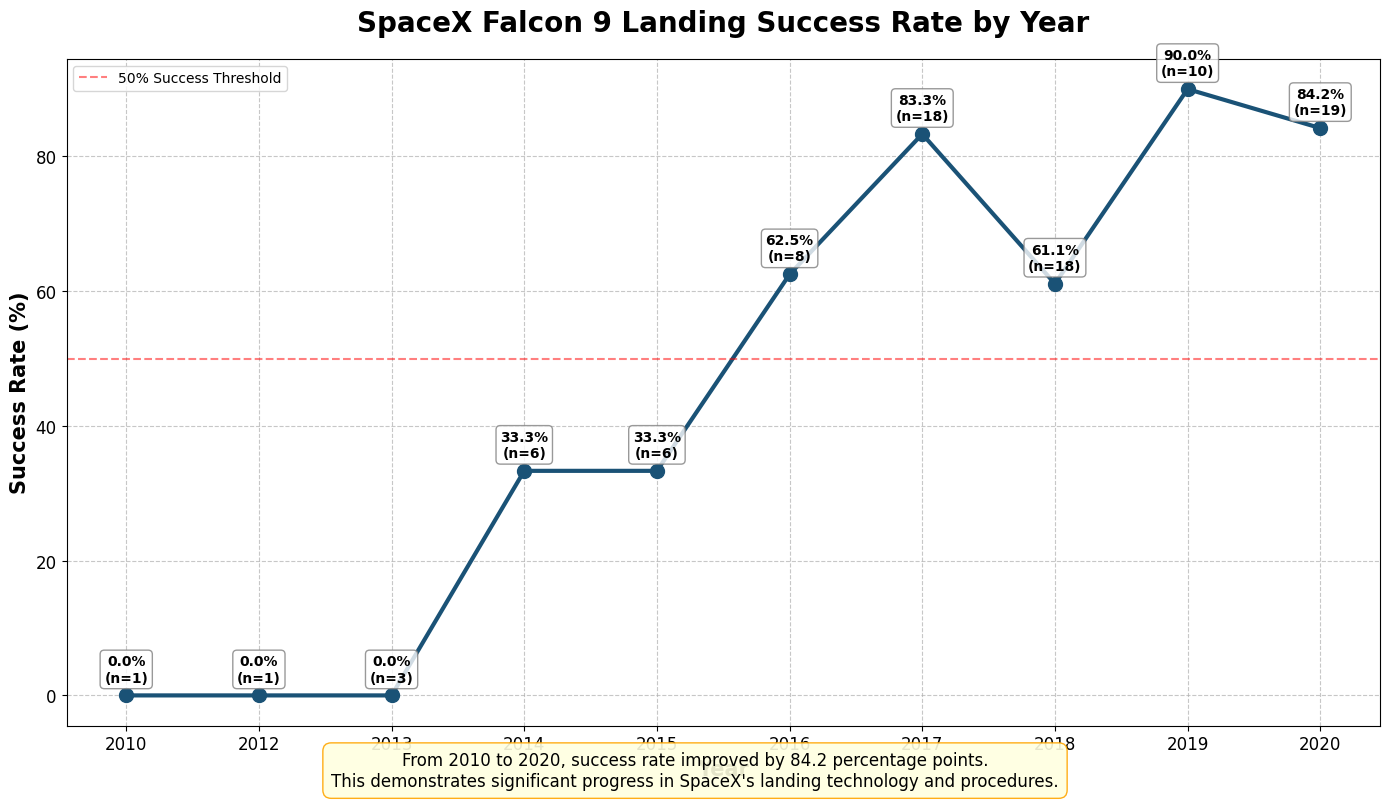


Yearly Landing Success Rate Progression:
2010: 0.0% success rate (1 launches)
2012: 0.0% success rate (1 launches)
2013: 0.0% success rate (3 launches)
2014: 33.3% success rate (6 launches)
2015: 33.3% success rate (6 launches)
2016: 62.5% success rate (8 launches)
2017: 83.3% success rate (18 launches)
2018: 61.1% success rate (18 launches)
2019: 90.0% success rate (10 launches)
2020: 84.2% success rate (19 launches)


In [17]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Year'] = year
df.head()

# Calculate success rate by year
yearly_success = df.groupby('Year')['Class'].mean() * 100
yearly_counts = df.groupby('Year').size()

# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.figure(figsize=(14, 8))

# Create the line chart with markers
plt.plot(yearly_success.index, yearly_success.values, 'o-', linewidth=3, markersize=10, color='#1A5276')

# Add data point annotations
for i, (year, success_rate) in enumerate(yearly_success.items()):
    count = yearly_counts[year]
    plt.annotate(f"{success_rate:.1f}%\n(n={count})", 
                 (year, success_rate),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Enhance styling
plt.xlabel("Year", fontsize=15, fontweight='bold')
plt.ylabel("Success Rate (%)", fontsize=15, fontweight='bold')
plt.title("SpaceX Falcon 9 Landing Success Rate by Year", fontsize=20, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add reference line for 50% success
plt.axhline(y=50, color='red', linestyle='--', alpha=0.5, label="50% Success Threshold")

# Add trend analysis annotation
first_year = yearly_success.index[0]
last_year = yearly_success.index[-1]
improvement = yearly_success.iloc[-1] - yearly_success.iloc[0]

analysis_text = f"From {first_year} to {last_year}, success rate improved by {improvement:.1f} percentage points.\n"
if improvement > 0:
    analysis_text += "This demonstrates significant progress in SpaceX's landing technology and procedures."
else:
    analysis_text += "This suggests challenges in maintaining consistent landing success."

plt.figtext(0.5, 0.01, analysis_text, ha='center', fontsize=12, 
            bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", ec="orange", alpha=0.9))

plt.legend()
plt.tight_layout()
plt.show()

# Print yearly statistics
print("\nYearly Landing Success Rate Progression:")
for year, success_rate in yearly_success.items():
    count = yearly_counts[year]
    print(f"{year}: {success_rate:.1f}% success rate ({count} launches)")

## Feature Engineering: Creating Dummy Variables

### Objective
Prepare categorical data for machine learning models by:
1. Converting categorical variables into numerical features
2. Creating one-hot encoded vectors for orbit types, launch sites, landing pads, and booster serials
3. Standardizing the dataset structure for predictive modeling

### Approach
We'll apply one-hot encoding to categorical columns (Orbit, LaunchSite, LandingPad, and Serial) using pandas' `get_dummies()` function. This transforms categorical variables into binary vectors that machine learning algorithms can process.

### Significance
One-hot encoding is essential for machine learning with categorical data because:
- Most ML algorithms require numerical inputs
- Categorical variables have no inherent ordinal relationship
- Binary representation preserves the categorical nature while enabling mathematical operations
- It prevents models from incorrectly interpreting categories as having numerical relationships

This transformation will significantly expand our feature space, creating a rich set of predictors for our landing success model.

In [18]:
# Select the features for our dataset
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Check the initial feature set
print("Original features dataframe:")
print(f"Shape: {features.shape}")
print("\nColumn types:")
print(features.dtypes)
print("\nSample data:")
features.head()

# Apply one-hot encoding to categorical columns
# Use get_dummies() function on the categorical columns: Orbit, LaunchSite, LandingPad, and Serial
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the results
print("\nOne-hot encoded features dataframe:")
print(f"Shape: {features_one_hot.shape}")
print(f"Number of columns after encoding: {features_one_hot.shape[1]}")
print("\nNew column names (first 15):")
print(features_one_hot.columns[:15].tolist())
print("...\n(additional columns not shown)\n")

# Display some statistics about the transformation
original_columns = features.shape[1]
new_columns = features_one_hot.shape[1]
column_increase = new_columns - original_columns
expansion_factor = new_columns / original_columns

print(f"Column Expansion Analysis:")
print(f"- Original column count: {original_columns}")
print(f"- New column count: {new_columns}")
print(f"- Net increase: {column_increase} columns")
print(f"- Expansion factor: {expansion_factor:.1f}x")

print("\nCategory Counts:")
print(f"- Unique Orbit types: {features['Orbit'].nunique()}")
print(f"- Unique Launch Sites: {features['LaunchSite'].nunique()}")
print(f"- Unique Landing Pads: {features['LandingPad'].dropna().nunique()}")
print(f"- Unique Serial numbers: {features['Serial'].nunique()}")

# Show a preview of the encoded dataframe
features_one_hot.head()

Original features dataframe:
Shape: (90, 12)

Column types:
FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

Sample data:

One-hot encoded features dataframe:
Shape: (90, 80)
Number of columns after encoding: 80

New column names (first 15):
['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO']
...
(additional columns not shown)

Column Expansion Analysis:
- Original column count: 12
- New column count: 80
- Net increase: 68 columns
- Expansion factor: 6.7x

Category Counts:
- Unique Orbit types: 11
- Unique Launch Sites: 3
- Unique Landing Pads: 5
- Unique Serial numbers: 53


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


## Data Type Standardization: Converting to float64

### Objective
Standardize the data types in our feature set to ensure:
1. Consistent numerical precision across all features
2. Compatibility with machine learning algorithms
3. Optimal memory usage and computational efficiency

### Approach
We'll convert all columns in the one-hot encoded dataframe to the `float64` data type using pandas' `astype()` method. This ensures uniform precision and representation across our feature space.

### Significance
Consistent data types are crucial for machine learning because:
- Many algorithms expect uniform data types
- Mixed types can cause unexpected behavior or errors
- `float64` provides sufficient precision for our numerical features
- Standardized types improve computational efficiency and compatibility

This is the final preprocessing step before our data is ready for model development.

In [20]:
# Check the current data types
print("Original data types:")
print(features_one_hot.dtypes.value_counts())

# Cast all columns to float64
features_one_hot = features_one_hot.astype('float64')

# Verify the conversion
print("\nData types after conversion:")
print(features_one_hot.dtypes.value_counts())

# Display memory usage before and after
print("\nMemory usage information:")
memory_before = features.memory_usage(deep=True).sum()
memory_after = features_one_hot.memory_usage(deep=True).sum()
print(f"- Original features memory usage: {memory_before / 1024:.2f} KB")
print(f"- Converted features memory usage: {memory_after / 1024:.2f} KB")
print(f"- Memory increase: {(memory_after - memory_before) / 1024:.2f} KB")

# Verify data integrity after conversion
print("\nValidating data integrity after conversion:")
print(f"- Any NaN values: {features_one_hot.isna().any().any()}")
print(f"- Any infinite values: {np.isinf(features_one_hot.values).any()}")

print("\nDataFrame information after type conversion:")
features_one_hot.info()

# Show a sample of the final dataframe
print("\nSample of final standardized dataframe:")
features_one_hot.head()

# Export to CSV for future use
# Uncomment the following line to save the dataframe
# features_one_hot.to_csv('dataset_part_3.csv', index=False)
print("\n✅ Data preprocessing complete. Dataset is ready for machine learning.")

Original data types:
bool       75
int64       3
float64     2
Name: count, dtype: int64

Data types after conversion:
float64    80
Name: count, dtype: int64

Memory usage information:
- Original features memory usage: 15.72 KB
- Converted features memory usage: 56.32 KB
- Memory increase: 40.60 KB

Validating data integrity after conversion:
- Any NaN values: False
- Any infinite values: False

DataFrame information after type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null   

## Summary and Conclusion

### Accomplishments
In this exploratory data analysis, we have:
1. Examined the relationships between flight sequence, launch sites, and landing outcomes
2. Analyzed payload mass distributions across different launch facilities
3. Identified success rate patterns for various orbit types
4. Tracked SpaceX's landing technology evolution through temporal analysis
5. Transformed categorical data into machine learning-ready features

### Key Insights
- Success rates have steadily improved over time, demonstrating SpaceX's iterative engineering approach
- Different launch sites show varying success rates, with some sites better optimized for specific mission types
- Payload mass significantly impacts landing success probability, with heavier payloads presenting greater challenges
- Certain orbit types (particularly GTO) have lower success rates due to their high energy requirements
- SpaceX's booster technology advancements (reflected in Block versions) correlate strongly with improved landing success

### Next Steps
This prepared dataset is now ready for machine learning model development, where we will:
- Build predictive models to estimate landing success probability
- Identify the most influential features for successful landings
- Create a model that can estimate the cost of launches based on mission parameters
- Develop interactive tools for mission planning and analysis

This analysis provides valuable insights for competitive pricing strategies and risk assessment in the commercial space industry.